In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [2]:
#import all the necessary libraries
import warnings
warnings.filterwarnings("ignore")

from numpy import mean
from numpy import std
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold,RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
import matplotlib.pyplot as plt

In [3]:
plt.style.use("ggplot")
plt.rcParams["axes.labelweight"] = "bold"
warnings.simplefilter('ignore')

In [4]:
!pip install xgboost

In [5]:
data = pd.read_csv("data_wrangling.csv",index_col = 0)
data.head()


,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,GF,GH,GI,GL,Class,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,2003.810319,22.136229,69.834944,0.120343,1,B,C,G,D,3/19/2019
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,27981.562750,29.135430,32.131996,21.978000,0,A,C,M,B,Unknown
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,13676.957810,28.022851,35.192676,0.196941,0,A,C,M,B,Unknown
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,2094.262452,39.948656,90.493248,0.155829,0,A,C,M,B,Unknown
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8524.370502,45.381316,36.262628,0.096614,1,D,B,F,B,3/25/2020


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617 entries, 0 to 616
Data columns (total 63 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       617 non-null    object 
 1   AB       617 non-null    float64
 2   AF       617 non-null    float64
 3   AH       617 non-null    float64
 4   AM       617 non-null    float64
 5   AR       617 non-null    float64
 6   AX       617 non-null    float64
 7   AY       617 non-null    float64
 8   AZ       617 non-null    float64
 9   BC       617 non-null    float64
 10  BD       617 non-null    float64
 11  BN       617 non-null    float64
 12  BP       617 non-null    float64
 13  BQ       617 non-null    float64
 14  BR       617 non-null    float64
 15  BZ       617 non-null    float64
 16  CB       617 non-null    float64
 17  CC       617 non-null    float64
 18  CD       617 non-null    float64
 19  CF       617 non-null    float64
 20  CH       617 non-null    float64
 21  CL       617 non

In [7]:
data.set_index('Id',inplace = True)
data.head()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,GF,GH,GI,GL,Class,Alpha,Beta,Gamma,Delta,Epsilon
Id,,,,,,,,,,,,,,,,,,,,,
000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,2003.810319,22.136229,69.834944,0.120343,1,B,C,G,D,3/19/2019
007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,27981.562750,29.135430,32.131996,21.978000,0,A,C,M,B,Unknown
013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,13676.957810,28.022851,35.192676,0.196941,0,A,C,M,B,Unknown
043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,2094.262452,39.948656,90.493248,0.155829,0,A,C,M,B,Unknown
044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,8524.370502,45.381316,36.262628,0.096614,1,D,B,F,B,3/25/2020


In [8]:
data.drop(['Epsilon'],axis = 1,inplace = True)

In [9]:
dfo = data.select_dtypes(include = 'object')
var_level_cnt = pd.DataFrame(dfo.nunique()).reset_index()
var_level_cnt.columns = ['VarName', 'LevelsCount']
var_level_cnt.sort_values(by='LevelsCount', ascending =False)
var_level_cnt

,VarName,LevelsCount
0,EJ,2
1,Alpha,4
2,Beta,3
3,Gamma,8
4,Delta,4


In [10]:
data['EJ'].value_counts()

B    395
A    222
Name: EJ, dtype: int64

In [11]:
data['EJ'].map({'A':0,'B':1})

Id
000ff2bfdfe9    1
007255e47698    0
013f2bd269f5    1
043ac50845d5    1
044fb8a146ec    1
               ..
fd3dafe738fd    0
fd895603f071    1
fd8ef6377f76    0
fe1942975e40    1
ffcca4ded3bb    0
Name: EJ, Length: 617, dtype: int64

In [12]:
data['EJ'] = data['EJ'].map({'A':0,'B':1})
data = data.iloc[:,:-4]

In [13]:
data['EJ']

Id
000ff2bfdfe9    1
007255e47698    0
013f2bd269f5    1
043ac50845d5    1
044fb8a146ec    1
               ..
fd3dafe738fd    0
fd895603f071    1
fd8ef6377f76    0
fe1942975e40    1
ffcca4ded3bb    0
Name: EJ, Length: 617, dtype: int64

In [14]:
# Split the data 
from sklearn.model_selection import train_test_split
X = data.drop(['Class'],axis= 1)
y = data.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123,stratify = y)

In [15]:
X_train.shape,y_train.shape

((493, 56), (493,))

In [16]:
X_test.shape,y_test.shape

((124, 56), (124,))

In [17]:
y_train.value_counts()

0    407
1     86
Name: Class, dtype: int64

In [18]:
#Scale the data
from sklearn.preprocessing import StandardScaler
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [19]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_train_oversampled,y_train_oversampled = smote.fit_resample(X_train,y_train)

In [22]:
type(y_train)

pandas.core.series.Series

In [23]:
# # Assuming X_train is a 2D array or dataframe and y_train is a 1D array
# # Check data types
# print(type(X_train))
# print(type(y_train))

# # Check shapes
# print(X_train.shape)
# print(y_train.shape)

# # Check unique classes in y_train
# print(np.unique(y_train))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
(493, 56)
(493,)
[0 1]


In [20]:
X_train_oversampled.shape,y_train_oversampled.shape

((814, 56), (814,))

In [21]:
y_train_oversampled.value_counts()

1    407
0    407
Name: Class, dtype: int64

In [31]:
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import make_scorer, log_loss, confusion_matrix

# # Assuming you have already defined your classifier model and prepared your data X and y

# # Define a function to calculate balanced log-loss
# def balanced_log_loss(y_true, y_pred, eps=1e-15):
#     y_pred = np.clip(y_pred, eps, 1 - eps)  # Clip probabilities to avoid numerical instability
#     balanced_weights = np.sum(y_true, axis=0) / np.sum(y_true)  # Compute class weights
#     balanced_logloss = -np.sum(balanced_weights * y_true * np.log(y_pred)) / np.sum(balanced_weights)
#     return balanced_logloss

# # Use make_scorer to convert the custom function into a scorer
# scoring_metric = make_scorer(balanced_log_loss, greater_is_better=False, needs_proba=True)


In [147]:
# from sklearn.utils.class_weight import compute_sample_weight
# def balanced_log_loss_sklearn(y_true,y_pred):
#     sample_weights = compute_sample_weight(class_weight = 'balanced',y=y_true)
#     return log_loss(y_true,y_pred,sample_weight = sample_weights)



In [148]:
def balanced_log_loss_manual(y_true, y_pred):
    # y_true: correct labels 0, 1
    # y_pred: predicted probabilities of class=1
    # calculate the number of observations for each class
    N_0 = np.sum(1 - y_true)
    N_1 = np.sum(y_true)
    # calculate the weights for each class to balance classes
    w_0 = 1 / N_0
    w_1 = 1 / N_1
    # calculate the predicted probabilities for each class
    p_1 = np.clip(y_pred, 1e-15, 1 - 1e-15)
    p_0 = 1 - p_1
    # calculate the summed log loss for each class
    log_loss_0 = -np.sum((1 - y_true) * np.log(p_0))
    log_loss_1 = -np.sum(y_true * np.log(p_1))
    # calculate the weighted summed logarithmic loss
    # (factgor of 2 included to give same result as LL with balanced input)
    balanced_log_loss = 2*(w_0 * log_loss_0 + w_1 * log_loss_1) / (w_0 + w_1)
    # return the average log loss
    return balanced_log_loss/(N_0+N_1)

Negative balanced log loss might suggest the following:

* The model's predicted probabilities for the majority class (class 0) are highly confident and close to 0.
* The class imbalance is significantly affecting the computation of the balanced log loss.
* The negative value is an artifact of the way the log loss is weighted and balanced across classes.

While a negative balanced log loss might be mathematically possible due to these factors, it's important to interpret it in context. Negative balanced log loss doesn't change the fundamental interpretation of log loss—it's still a measure of prediction quality, with lower values indicating better predictions. 

In [149]:

scoring_metric_manual = make_scorer(balanced_log_loss_manual, greater_is_better=False, needs_proba=True)

#define evaluation procedure
def evaluate_model_manual(X, y, model):
    cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 5, random_state = 1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=scoring_metric_manual, cv=cv, n_jobs=-1)
    
    return scores

>SVM -0.150 (0.048)
>KNN -1.018 (0.422)
>RF -0.180 (0.011)
>LogReg -0.288 (0.077)
>XGB -0.093 (0.035)


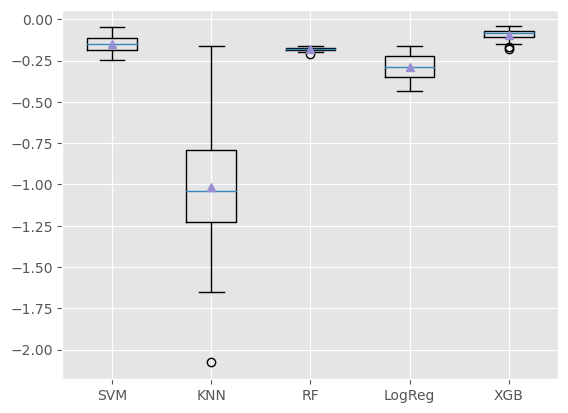

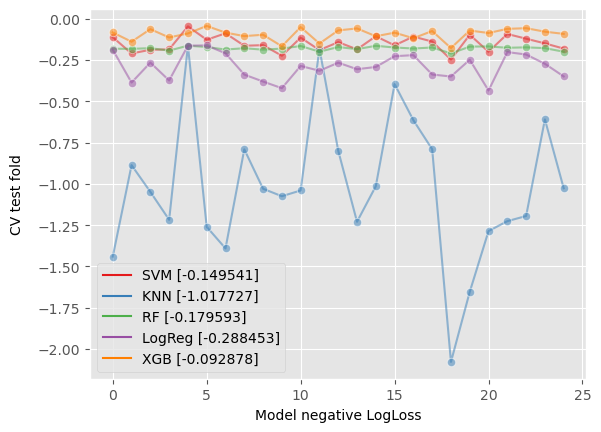

In [150]:
#MANUAL BALANCED LOGLOSS
# define models to test
def get_models():
    models, names = list(), list()
    
    # SVM
    models.append(SVC(gamma='auto',probability=True))
    names.append('SVM')
    
    # KNN
    models.append(KNeighborsClassifier())
    names.append('KNN')
    
    # RF
    models.append(RandomForestClassifier(n_estimators=500))
    names.append('RF')
    
    #LogisticRegression
    models.append(LogisticRegression())
    names.append('LogReg')
    
    #XGB
    models.append(xgb.XGBClassifier(n_estimators = 500))
    names.append('XGB')
    return models, names

# define models
models, names = get_models()
results = list()


# evaluate each model
for i in range(len(models)):
    # evaluate the model and store results
    scores = evaluate_model_manual(X_train_oversampled, y_train_oversampled, models[i])
    results.append(scores)
    # summarize performance
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))
    

# plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

dic = {f'SVM [{round(np.mean(results[0]),6)}]' : [],
       f'KNN [{round(np.mean(results[1]),6)}]' : [],
      f'RF [{round(np.mean(results[2]),6)}]' : [],
      f'LogReg [{round(np.mean(results[3]),6)}]' : [],
      f'XGB [{round(np.mean(results[4]),6)}]' : []}
sns.lineplot(data = dict(zip(dic,results)),
            dashes = False,
            palette = "Set1",marker = "o",
            alpha = 0.5)
plt.xlabel("Model negative LogLoss")
plt.ylabel("CV test fold",labelpad =  10)
plt.show()

In [151]:
# scoring_metric_sklearn = make_scorer(balanced_log_loss_sklearn, greater_is_better=False, needs_proba=True)
# #define evaluation procedure
# def evaluate_model_sklearn(X, y, model):
#     cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 5, random_state = 1)
#     # evaluate model
#     scores = cross_val_score(model, X, y, scoring=scoring_metric_sklearn, cv=cv, n_jobs=-1)
    
#     return scores

>SVM -0.149 (0.048)
>KNN -1.054 (0.441)
>RF -0.179 (0.012)
>LogReg -0.288 (0.077)
>XGB -0.093 (0.035)


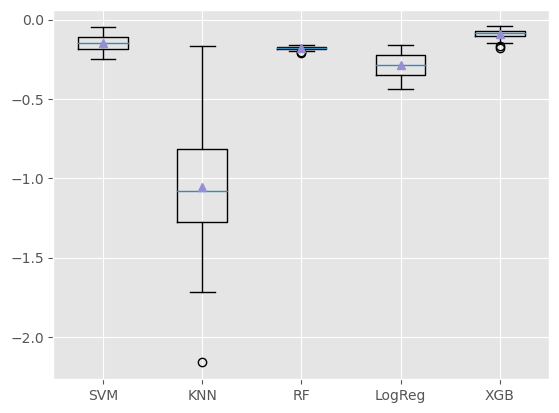

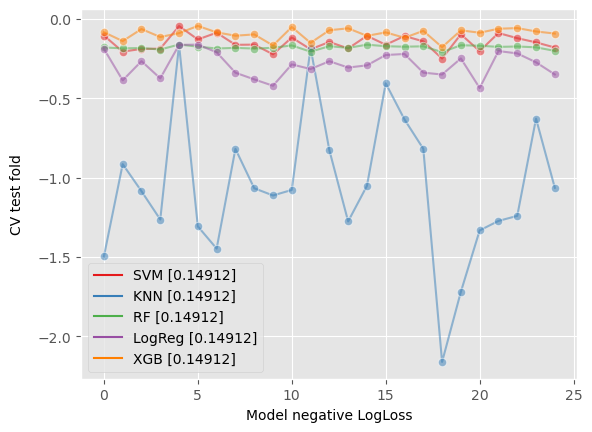

In [152]:
# #SKLEARN BALANCED LOGLOSS
# # define models to test
# def get_models():
#     models, names = list(), list()
    
#     # SVM
#     models.append(SVC(gamma='auto',probability=True))
#     names.append('SVM')
    
#     # KNN
#     models.append(KNeighborsClassifier())
#     names.append('KNN')
    
#     # RF
#     models.append(RandomForestClassifier(n_estimators=500))
#     names.append('RF')
    
#     #LogisticRegression
#     models.append(LogisticRegression())
#     names.append('LogReg')
    
#     #XGB
#     models.append(xgb.XGBClassifier(n_estimators = 500))
#     names.append('XGB')
#     return models, names

# # define models
# models, names = get_models()
# results = list()


# # evaluate each model
# for i in range(len(models)):
#     # evaluate the model and store results
#     scores = evaluate_model_sklearn(X_train_oversampled, y_train_oversampled, models[i])
#     results.append(scores)
#     # summarize performance
#     print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))
    

# # plot the results
# pyplot.boxplot(results, labels=names, showmeans=True)
# pyplot.show()

# dic = {f'SVM [{round(np.mean(results[0]),6)}]' : [],
#        f'KNN [{round(np.mean(results[0]),6)}]' : [],
#       f'RF [{round(np.mean(results[0]),6)}]' : [],
#       f'LogReg [{round(np.mean(results[0]),6)}]' : [],
#       f'XGB [{round(np.mean(results[0]),6)}]' : []}
# sns.lineplot(data = dict(zip(dic,results)),
#             dashes = False,
#             palette = "Set1",marker = "o",
#             alpha = 0.5)
# plt.xlabel("Model negative LogLoss")
# plt.ylabel("CV test fold",labelpad =  10)
# plt.show()

In [153]:
# # Logistic Regression
# logreg = LogisticRegression()
# logreg.fit(X_train_oversampled, y_train_oversampled)
# logreg_predictions = logreg.predict_proba(X_test)
# logreg_logloss = balanced_log_loss_sklearn(y_test, logreg_predictions)
# print("Log Loss (Logistic Regression):", logreg_logloss)

# # Support Vector Machines (SVM)
# svm = SVC(probability=True)
# svm.fit(X_train_oversampled, y_train_oversampled)
# svm_predictions = svm.predict_proba(X_test)
# svm_logloss = balanced_log_loss_sklearn(y_test, svm_predictions)
# print("Log Loss (SVM):", svm_logloss)

# # Random Forest
# rf = RandomForestClassifier()
# rf.fit(X_train_oversampled, y_train_oversampled)
# rf_predictions = rf.predict_proba(X_test)
# rf_logloss = balanced_log_loss_sklearn(y_test, rf_predictions)
# print("Log Loss (Random Forest):", rf_logloss)



# xg = xgb.XGBClassifier(n_estimators = 1000)
# xg.fit(X_train_oversampled, y_train_oversampled)
# xg_predictions = xg.predict_proba(X_test)
# xg_logloss = balanced_log_loss_sklearn(y_test, xg_predictions)
# print("Log Loss (XGBOOST):", xg_logloss)


In [154]:
# # Logistic Regression
# logreg = LogisticRegression()
# logreg.fit(X_train_oversampled, y_train_oversampled)
# logreg_predictions = logreg.predict_proba(X_test)
# logreg_logloss = balanced_log_loss_manual(y_test, logreg_predictions[:, 1])
# print("Log Loss (Logistic Regression):", logreg_logloss)

# # Support Vector Machines (SVM)
# svm = SVC(probability=True)
# svm.fit(X_train_oversampled, y_train_oversampled)
# svm_predictions = svm.predict_proba(X_test)
# svm_logloss = balanced_log_loss_manual(y_test, svm_predictions[:,1])
# print("Log Loss (SVM):", svm_logloss)

# # Random Forest
# rf = RandomForestClassifier()
# rf.fit(X_train_oversampled, y_train_oversampled)
# rf_predictions = rf.predict_proba(X_test)
# rf_logloss = balanced_log_loss_manual(y_test, rf_predictions[:,1])
# print("Log Loss (Random Forest):", rf_logloss)



# xg = xgb.XGBClassifier(n_estimators = 1000)
# xg.fit(X_train_oversampled, y_train_oversampled)
# xg_predictions = xg.predict_proba(X_test)
# xg_logloss = balanced_log_loss_manual(y_test, xg_predictions[:,1])
# print("Log Loss (XGBOOST):", xg_logloss)


### RandomForestClassifier 

In [155]:
#RandomForestClassifier 

from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=500,random_state = 1,n_jobs=-1)
model_res = model_rf.fit(X_train, y_train)

cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 5,random_state = 1)

scoring_metric_manual = make_scorer(balanced_log_loss_manual, greater_is_better=False, needs_proba=True)


# evaluate model
scores = cross_val_score(model_rf, X_train_oversampled, y_train_oversampled, scoring=scoring_metric_manual, cv=cv, n_jobs=-1)

y_pred = model_res.predict(X_test)
ac = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)
print("Balanced log loss: ", abs(np.mean(scores)))
print("train accuracy: ",model_rf.score(X_train_oversampled,y_train_oversampled))
print("test accuracy: ", model_rf.score(X_test,y_test))
print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Balanced log loss:  0.17968312597234135
train accuracy:  0.9385749385749386
test accuracy:  0.8951612903225806
Random Forest: Accuracy=0.895
Random Forest: f1-score=0.890
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       102
           1       0.76      0.59      0.67        22

    accuracy                           0.90       124
   macro avg       0.84      0.78      0.80       124
weighted avg       0.89      0.90      0.89       124

[[98  4]
 [ 9 13]]


In [156]:
# #RandomForestClassifier 

# from sklearn.ensemble import RandomForestClassifier
# model_rf = RandomForestClassifier(n_estimators=500,random_state = 1,n_jobs=-1)
# model_res = model_rf.fit(X_train, y_train)

# cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 5,random_state = 1)

# scoring_metric_sklearn = make_scorer(balanced_log_loss_sklearn, greater_is_better=False, needs_proba=True)


# # evaluate model
# scores = cross_val_score(model_rf, X_train_oversampled, y_train_oversampled, scoring=scoring_metric_sklearn, cv=cv, n_jobs=-1)

# y_pred = model_res.predict(X_test)
# ac = accuracy_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred, average='weighted')
# cm = confusion_matrix(y_test, y_pred)
# print("Balanced logloss: ", abs(np.mean(scores)))
# print("train accuracy: ",model_rf.score(X_train_oversampled,y_train_oversampled))
# print("test accuracy: ", model_rf.score(X_test,y_test))
# print('Random Forest: Accuracy=%.3f' % (ac))

# print('Random Forest: f1-score=%.3f' % (f1))

# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

Balanced logloss:  0.1796885819969927
train accuracy:  0.9385749385749386
test accuracy:  0.8951612903225806
Random Forest: Accuracy=0.895
Random Forest: f1-score=0.890
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       102
           1       0.76      0.59      0.67        22

    accuracy                           0.90       124
   macro avg       0.84      0.78      0.80       124
weighted avg       0.89      0.90      0.89       124

[[98  4]
 [ 9 13]]


Text(0.5, 1.0, 'Probability Density Plot for RF Classifier')

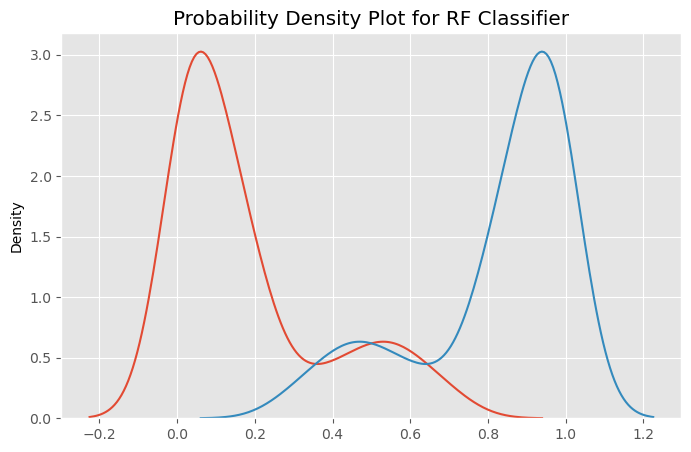

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_prob = model_res.predict_proba(X_test)
plt.figure(figsize=(8,5))
sns.kdeplot(y_pred_prob[:,1],label="RF",common_norm=False)
sns.kdeplot(y_pred_prob[:,0],label="RF",common_norm=False)

plt.title("Probability Density Plot for RF Classifier")

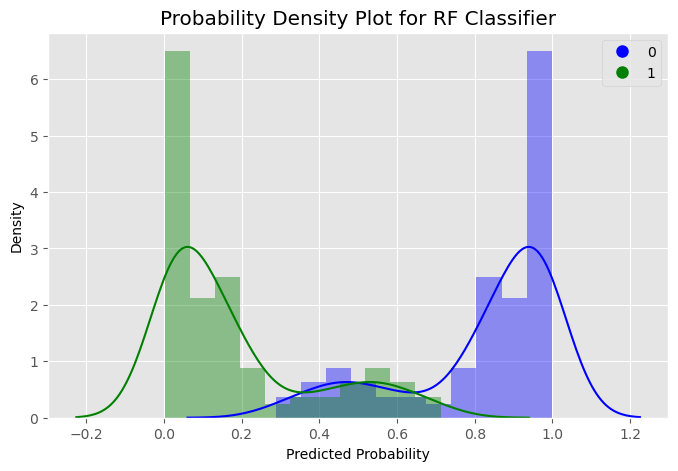

In [158]:
import matplotlib.lines as mlines
plt.figure(figsize=(8, 5))
sns.distplot(y_pred_prob[:, 0], label="RF",color = 'blue')
sns.distplot(y_pred_prob[:, 1], label="RF",color = 'green')


# Custom legend entries for '0' and '1'
legend_entries = [
    mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=8, label='0'),
    mlines.Line2D([], [], color='green', marker='o', linestyle='None', markersize=8, label='1')
]

plt.title("Probability Density Plot for RF Classifier")
plt.xlabel("Predicted Probability")
plt.ylabel("Density")
#plt.xlim(0, 1)  # Set x-axis limits to be between 0 and 1

# Add custom legend entries
plt.legend(handles=legend_entries)

plt.show()

In [159]:
data_dict = {'True Label (y_test)': y_test, 'Predicted Probability (y_pred)': y_pred}

# Create a pandas DataFrame from the dictionary
df_comparison = pd.DataFrame(data_dict)

# Display the DataFrame
df_comparison

,True Label (y_test),Predicted Probability (y_pred)
Id,,
a20c68851e9b,0,0
3a73fce81608,0,0
55122c3c02a0,0,0
810ff5afd0e2,0,1
7c21c57859d6,0,0
...,...,...
c9e8391da0ea,0,0
c7f5064f4265,1,1
f003d68995be,0,0


In [160]:
df_comparison[df_comparison['True Label (y_test)'] != df_comparison['Predicted Probability (y_pred)']]

,True Label (y_test),Predicted Probability (y_pred)
Id,,
810ff5afd0e2,0,1
3924089e4396,1,0
49b8f248a42f,1,0
24b40510d6a2,1,0
ed3486389307,1,0
e253dc2f97c0,1,0
8e5a0d625d98,0,1
000ff2bfdfe9,1,0
34a025893d36,1,0


In [117]:
%%time
#Randomised cross validation

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc, classification_report, recall_score, precision_recall_curve
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, precision_score

# Rest of your code...
# Compute the costs
from sklearn.utils import class_weight
# class_weight = class_weight.compute_class_weight('balanced')
# weights = dict(zip(np.unique(y_train_oversampled),class_weight))

#RandomForestClassifier with weights(COST-SENSITIVE METHOD)


cross_val = RepeatedStratifiedKFold(n_splits=5,n_repeats = 5, random_state = 1)
#index_iterator = cross_val.split(X_train, y_train)
params = {'max_depth': [25,30,35,40], 
          'min_samples_split': [4,6,8,10],
          'min_samples_leaf' : [2,4,8,16],
          'n_estimators' : [400,600,800,1000],
          'max_features':[0.5,0.7,'sqrt']
             }
scoring = {#'Recall': make_scorer(recall_score,average = 'weighted'),
           #'f1_score': make_scorer(f1_score,average = 'weighted'),
           #'precision': make_scorer(precision_score,average = 'weighted'),
           #'Accuracy': make_scorer(accuracy_score),
           'Balanced_logloss': make_scorer(balanced_log_loss_manual, greater_is_better=False, needs_proba=True)
          }
clf = RandomForestClassifier(class_weight = 'balanced')
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = params, n_iter =50, cv = cross_val,
                            verbose=2, random_state =1, n_jobs = -1,scoring=scoring,refit='Balanced_logloss')
clf_random.fit(X_train_oversampled, y_train_oversampled)

Fitting 25 folds for each of 50 candidates, totalling 1250 fits
CPU times: user 10 s, sys: 394 ms, total: 10.4 s
Wall time: 22min 49s


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=1),
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [25, 30, 35, 40],
                                        'max_features': [0.5, 0.7, 'sqrt'],
                                        'min_samples_leaf': [2, 4, 8, 16],
                                        'min_samples_split': [4, 6, 8, 10],
                                        'n_estimators': [400, 600, 800, 1000]},
                   random_state=1, refit='Balanced_logloss',
                   scoring={'Balanced_logloss': make_scorer(balanced_log_loss_manual, greater_is_better=False, needs_proba=True)},
                   verbose=2)

In [121]:
print(clf_random.best_params_,clf_random.best_score_)

{'n_estimators': 400, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 0.7, 'max_depth': 40} -0.16812918678672303


In [162]:
#RandomForestClassifier 

from sklearn.ensemble import RandomForestClassifier
model_rf_best = RandomForestClassifier(n_estimators=400,min_samples_split=4,min_samples_leaf = 2,
                                  max_features = 0.7,
                                  max_depth = 40,
                                  random_state = 1,n_jobs=-1)
model_res_best = model_rf_best.fit(X_train, y_train)

cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 5,random_state = 1)

scoring_metric = make_scorer(balanced_log_loss_manual, greater_is_better=False, needs_proba=True)


# evaluate model
scores = cross_val_score(model_rf_best, X_train_oversampled, y_train_oversampled, scoring=scoring_metric, cv=cv, n_jobs=-1)

y_pred = model_res_best.predict(X_test)
ac = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)
print("Balanced logloss: ", abs(np.mean(scores)))
print("train accuracy: ",model_rf_best.score(X_train_oversampled,y_train_oversampled))
print("test accuracy: ", model_rf_best.score(X_test,y_test))
print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Balanced logloss:  0.1682179161634613
train accuracy:  0.9348894348894349
test accuracy:  0.8870967741935484
Random Forest: Accuracy=0.887
Random Forest: f1-score=0.885
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       102
           1       0.70      0.64      0.67        22

    accuracy                           0.89       124
   macro avg       0.81      0.79      0.80       124
weighted avg       0.88      0.89      0.88       124

[[96  6]
 [ 8 14]]


In [161]:
# #RandomForestClassifier 

# from sklearn.ensemble import RandomForestClassifier
# model_rf_best = RandomForestClassifier(n_estimators=600,min_samples_split=4,min_samples_leaf = 2,
#                                   max_features = 'sqrt',
#                                   max_depth = 25,
#                                   random_state = 1,n_jobs=-1)
# model_res_best = model_rf_best.fit(X_train, y_train)

# cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 5,random_state = 1)

# scoring_metric = make_scorer(balanced_log_loss_manual, greater_is_better=False, needs_proba=True)


# # evaluate model
# scores = cross_val_score(model_rf_best, X_train_oversampled, y_train_oversampled, scoring=scoring_metric, cv=cv, n_jobs=-1)

# y_pred = model_res_best.predict(X_test)
# ac = accuracy_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred, average='weighted')
# cm = confusion_matrix(y_test, y_pred)
# print("Balanced logloss: ", abs(np.mean(scores)))
# print("train accuracy: ",model_rf_best.score(X_train_oversampled,y_train_oversampled))
# print("test accuracy: ", model_rf_best.score(X_test,y_test))
# print('Random Forest: Accuracy=%.3f' % (ac))

# print('Random Forest: f1-score=%.3f' % (f1))

# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

Balanced logloss:  0.1935023055457392
train accuracy:  0.9336609336609336
test accuracy:  0.8951612903225806
Random Forest: Accuracy=0.895
Random Forest: f1-score=0.890
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       102
           1       0.76      0.59      0.67        22

    accuracy                           0.90       124
   macro avg       0.84      0.78      0.80       124
weighted avg       0.89      0.90      0.89       124

[[98  4]
 [ 9 13]]


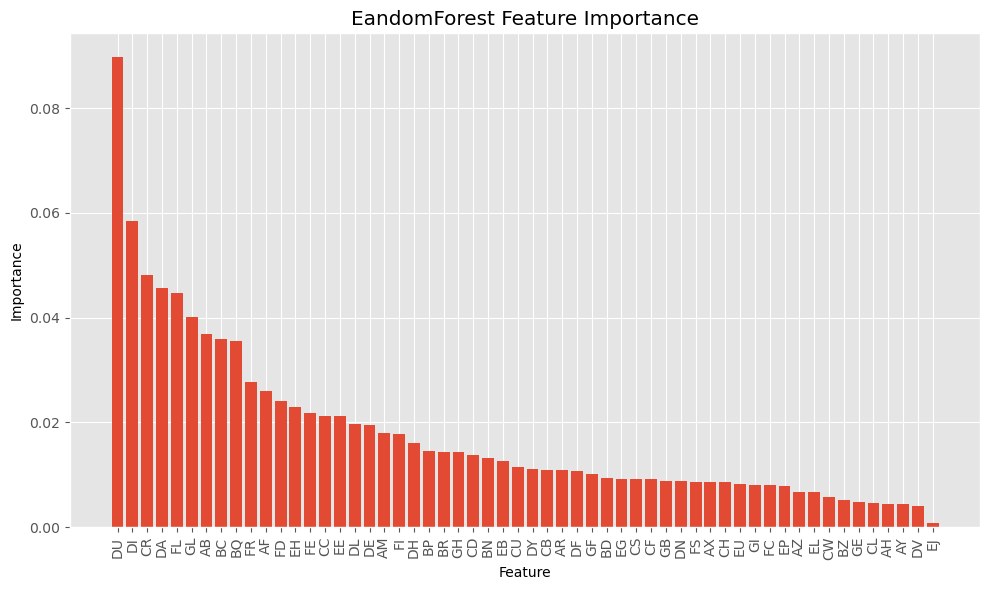

In [48]:
#Get feature importances
importances = model_rf.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), sorted_importances, align='center')
plt.xticks(range(X_train.shape[1]), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('EandomForest Feature Importance')
plt.tight_layout()
plt.show()

### XGBOOST

In [187]:
# Create and train the XGBoost model
from xgboost import XGBClassifier
model_xgb = XGBClassifier(n_estimators=500, random_state=1, n_jobs=-1)
model_res = model_xgb.fit(X_train_oversampled, y_train_oversampled)

# Set up cross-validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)

# Create the custom scoring metric
scoring_metric = make_scorer(balanced_log_loss_manual, greater_is_better=False, needs_proba=True)

# Evaluate model using cross-validation
scores = cross_val_score(model_res, X_train_oversampled, y_train_oversampled, scoring=scoring_metric, cv=cv, n_jobs=-1)

# Make predictions and evaluate the model on the test set
y_pred = model_res.predict(X_test)
ac = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

# Print results
print("Balanced logloss: ", abs(np.mean(scores)))
print("train accuracy: ", model_res.score(X_train_oversampled, y_train_oversampled))
print("test accuracy: ", model_res.score(X_test, y_test))
print('XGBoost: Accuracy=%.3f' % (ac))
print('XGBoost: f1-score=%.3f' % (f1))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
auc = metrics.roc_auc_score(y_test, model_res.predict(X_test))
print("auc=%.3f" % auc)

Balanced logloss:  0.09287785127135154
train accuracy:  1.0
test accuracy:  0.9112903225806451
XGBoost: Accuracy=0.911
XGBoost: f1-score=0.910
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       102
           1       0.76      0.73      0.74        22

    accuracy                           0.91       124
   macro avg       0.85      0.84      0.85       124
weighted avg       0.91      0.91      0.91       124

[[97  5]
 [ 6 16]]
auc=0.839


Text(0.5, 1.0, 'Probability Density Plot for XGB Classifier')

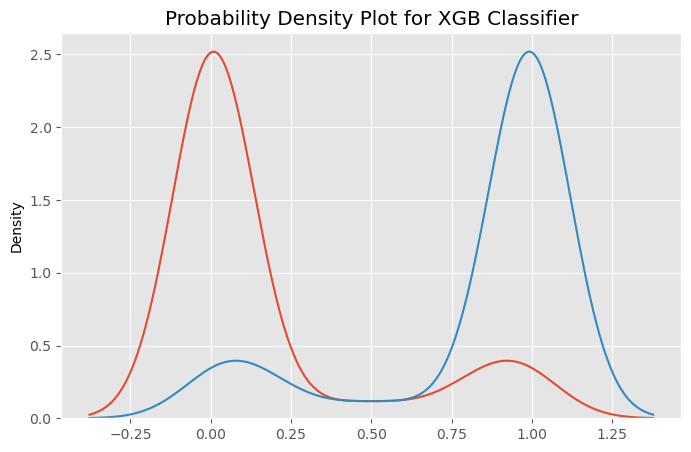

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_prob = model_res.predict_proba(X_test)
plt.figure(figsize=(8,5))
sns.kdeplot(y_pred_prob[:,1],label="XGB",common_norm=False)
sns.kdeplot(y_pred_prob[:,0],label="XGB",common_norm=False)

plt.title("Probability Density Plot for XGB Classifier")

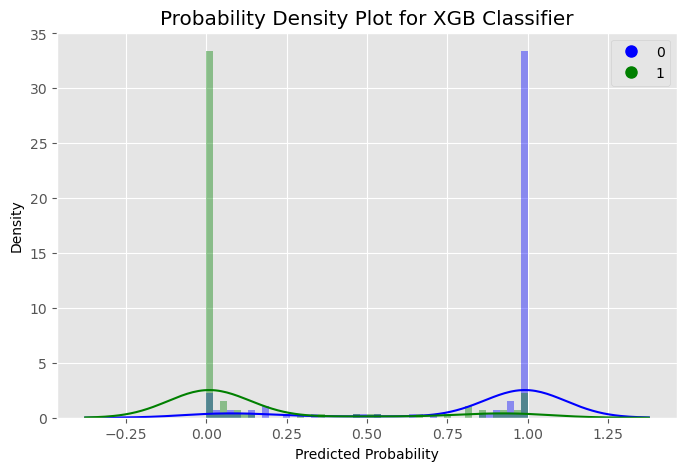

In [189]:
import matplotlib.lines as mlines
plt.figure(figsize=(8, 5))
sns.distplot(y_pred_prob[:, 0], label="XGB",color = 'blue')
sns.distplot(y_pred_prob[:, 1], label="XGB",color = 'green')


# Custom legend entries for '0' and '1'
legend_entries = [
    mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=8, label='0'),
    mlines.Line2D([], [], color='green', marker='o', linestyle='None', markersize=8, label='1')
]

plt.title("Probability Density Plot for XGB Classifier")
plt.xlabel("Predicted Probability")
plt.ylabel("Density")
#plt.xlim(0, 1)  # Set x-axis limits to be between 0 and 1

# Add custom legend entries
plt.legend(handles=legend_entries)

plt.show()

In [190]:
data_dict = {'True Label (y_test)': y_test, 'Predicted Probability (y_pred)': y_pred}

# Create a pandas DataFrame from the dictionary
df_comparison = pd.DataFrame(data_dict)

# Display the DataFrame
df_comparison

,True Label (y_test),Predicted Probability (y_pred)
Id,,
a20c68851e9b,0,0
3a73fce81608,0,0
55122c3c02a0,0,0
810ff5afd0e2,0,0
7c21c57859d6,0,0
...,...,...
c9e8391da0ea,0,0
c7f5064f4265,1,1
f003d68995be,0,0


In [191]:
df_comparison[df_comparison['True Label (y_test)'] != df_comparison['Predicted Probability (y_pred)']]

,True Label (y_test),Predicted Probability (y_pred)
Id,,
3924089e4396,1,0
49b8f248a42f,1,0
24b40510d6a2,1,0
ed3486389307,1,0
60474d8ff770,0,1
58dcdd9d6e89,0,1
8e5a0d625d98,0,1
8803ec4462c1,1,0
e2ef2a51ed65,0,1


In [167]:
df_comparison[df_comparison['True Label (y_test)'] != df_comparison['Predicted Probability (y_pred)']].shape

(10, 2)

In [178]:
#calculate precision and recall
def plot_precision_recall_curve(y_test, y_pred):
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

    #create precision recall curve
    fig, ax = plt.subplots()
    ax.plot(recall, precision, color='purple')

    #add axis labels to plot
    ax.set_title('Precision-Recall Curve')
    ax.set_ylabel('Precision')
    ax.set_xlabel('Recall')

    #display plot
    plt.show()
     

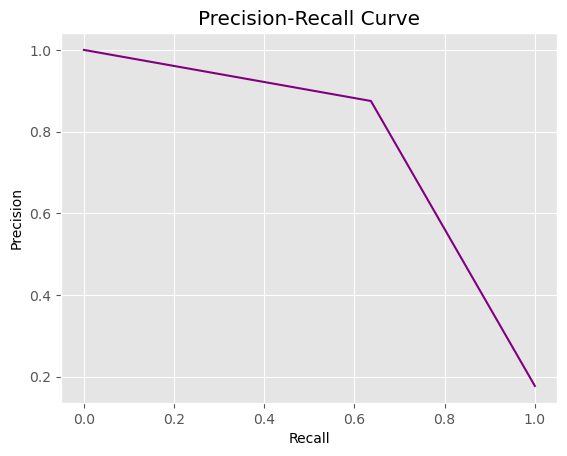

In [180]:
plot_precision_recall_curve(y_test, y_pred)

In [179]:
from sklearn import metrics
def plot_roc_curve(y_test, y_pred):
    auc = metrics.roc_auc_score(y_test, y_pred)
    false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)
    plt.figure(figsize=(10, 8), dpi=100)
    plt.axis('scaled')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.title("AUC & ROC Curve")
    plt.plot(false_positive_rate, true_positive_rate, 'g')
    plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()
     

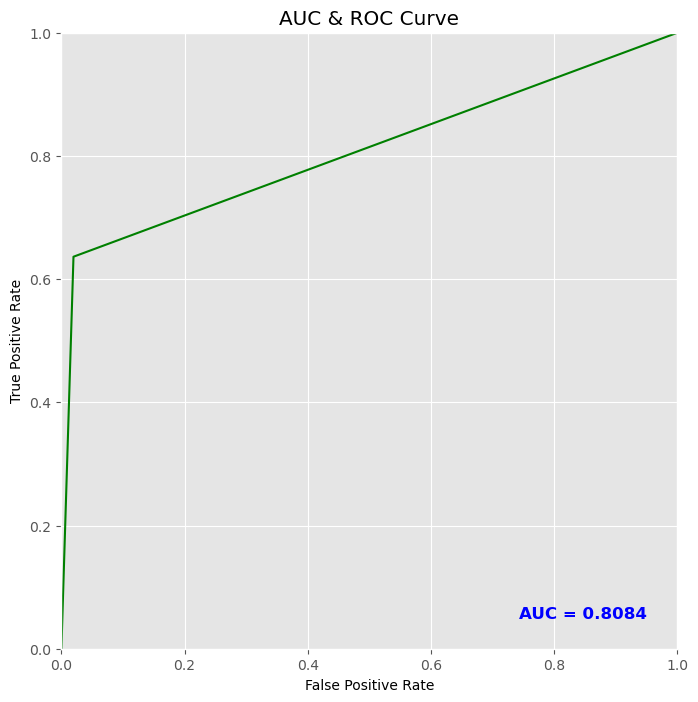

In [181]:
plot_roc_curve(y_test, y_pred)

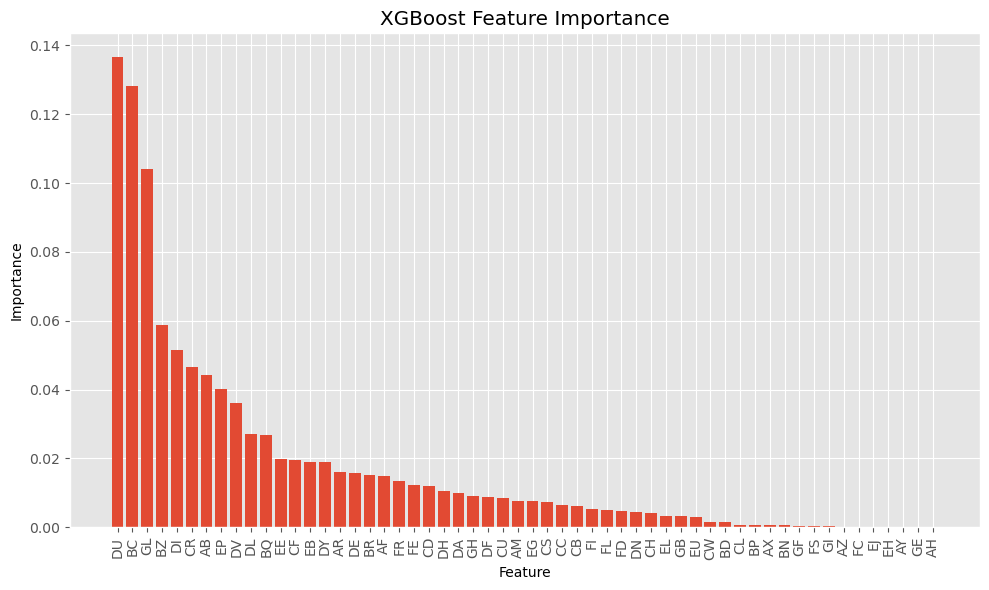

In [169]:
#Get feature importances
importances = model_xgb.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), sorted_importances, align='center')
plt.xticks(range(X_train.shape[1]), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()

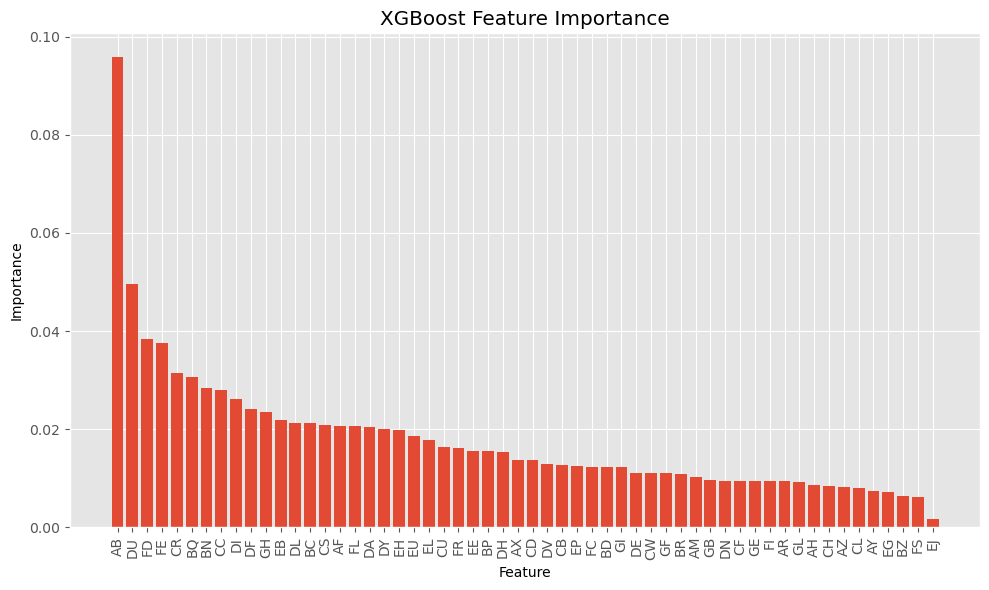

In [370]:
#Get feature importances
importances = model_res.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), sorted_importances, align='center')
plt.xticks(range(X_train.shape[1]), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()

In [371]:
X_train.shape

(493, 56)

In [372]:
sorted_feature_names

Index(['AB', 'DU', 'FD', 'FE', 'CR', 'BQ', 'BN', 'CC', 'DI', 'DF', 'GH', 'EB',
       'DL', 'BC', 'CS', 'AF', 'FL', 'DA', 'DY', 'EH', 'EU', 'EL', 'CU', 'FR',
       'EE', 'BP', 'DH', 'AX', 'CD', 'DV', 'CB', 'EP', 'FC', 'BD', 'GI', 'DE',
       'CW', 'GF', 'BR', 'AM', 'GB', 'DN', 'CF', 'GE', 'FI', 'AR', 'GL', 'AH',
       'CH', 'AZ', 'CL', 'AY', 'EG', 'BZ', 'FS', 'EJ'],
      dtype='object')

In [373]:
rounded_importances = [x for x in sorted_importances if round(x, 4)<=0]
print(len(rounded_importances))

0


In [374]:
dict(zip(sorted_feature_names,sorted_importances))

{'AB': 0.09590452,
 'DU': 0.049607206,
 'FD': 0.03842051,
 'FE': 0.037531704,
 'CR': 0.031424027,
 'BQ': 0.030700061,
 'BN': 0.028301425,
 'CC': 0.028044166,
 'DI': 0.02613609,
 'DF': 0.024180269,
 'GH': 0.023491312,
 'EB': 0.021809775,
 'DL': 0.021290712,
 'BC': 0.021151258,
 'CS': 0.020820195,
 'AF': 0.020553429,
 'FL': 0.020536726,
 'DA': 0.020479143,
 'DY': 0.019961946,
 'EH': 0.019886728,
 'EU': 0.018690376,
 'EL': 0.017710807,
 'CU': 0.016454294,
 'FR': 0.016079482,
 'EE': 0.015616004,
 'BP': 0.015477824,
 'DH': 0.015253299,
 'AX': 0.013748298,
 'CD': 0.013611781,
 'DV': 0.012923762,
 'CB': 0.012612048,
 'EP': 0.012568315,
 'FC': 0.012344726,
 'BD': 0.012252913,
 'GI': 0.012224658,
 'DE': 0.011105387,
 'CW': 0.011019946,
 'GF': 0.010961356,
 'BR': 0.010833163,
 'AM': 0.010173166,
 'GB': 0.009603587,
 'DN': 0.009522231,
 'CF': 0.009492433,
 'GE': 0.009470595,
 'FI': 0.009396841,
 'AR': 0.009396075,
 'GL': 0.009263433,
 'AH': 0.008638094,
 'CH': 0.008387755,
 'AZ': 0.008130531,
 'C

In [353]:
%%time
#Hyperparameter
ratio_of_neg_to_pos = len(y_train[y_train== 0]) / len(y_train[y_train == 1])


param_grid = {
    'learning_rate': [0.1, 0.05,0.01, 0.005,0.001],
    'n_estimators': [400,500,600,700,800],
    'max_depth': [3, 4, 5,6,7],
    'min_child_weight': [1, 5, 6,7,10],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2, 0.3],
    'scale_pos_weight': [ratio_of_neg_to_pos],
    'alpha': [0, 0.1, 0.01, 0.001],
    'lambda': [0, 0.1, 0.01, 0.001]  
}
# Create an instance of XGBClassifier with early stopping
xgbc = XGBClassifier(random_state=42,objective='binary:logistic')


# Set up cross-validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)

scoring = {
           'Balanced_logloss': make_scorer(balanced_log_loss_manual, greater_is_better=False, needs_proba=True)
          }

#,
# Set up RandomizedSearchCV
xgbc_random = RandomizedSearchCV(
    xgbc, param_grid, cv=cv, return_train_score=True, scoring=scoring, n_iter=100, 
    verbose=2, random_state =1, n_jobs = -1,refit='Balanced_logloss'
)

# Define the evaluation set
#eval_set = [(X_train_oversampled, y_train_oversampled), (X_test, y_test)]

# Fit RandomizedSearchCV with custom evaluation function and eval_set
xgbc_random.fit(X_train_oversampled, y_train_oversampled, verbose=True)

# Print the best parameters found by RandomizedSearchCV
print("Best Parameters:", xgbc_random.best_params_)
print("Best Accuracy:", xgb_random.best_score_)

Fitting 25 folds for each of 100 candidates, totalling 2500 fits
Best Parameters: {'subsample': 0.6, 'scale_pos_weight': 4.732558139534884, 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.05, 'lambda': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.6, 'alpha': 0.001}
Best Accuracy: 0.9663318942664546
CPU times: user 16.6 s, sys: 1.18 s, total: 17.8 s
Wall time: 15min 4s


In [354]:
print("Best Accuracy:", xgbc_random.best_score_)

Best Accuracy: -0.09125216332013654


In [355]:
print("Best Parameters:", xgbc_random.best_params_)

Best Parameters: {'subsample': 0.6, 'scale_pos_weight': 4.732558139534884, 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.05, 'lambda': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.6, 'alpha': 0.001}


In [345]:
#print("Best Parameters:", xgbc_random.best_params_)

Best Parameters: {'subsample': 0.7, 'scale_pos_weight': 4.732558139534884, 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'lambda': 0, 'gamma': 0, 'colsample_bytree': 0.7, 'alpha': 0.001}


In [356]:
# Create and train the XGBoost model
from xgboost import XGBClassifier
ratio_of_neg_to_pos = len(y_train[y_train== 0]) / len(y_train[y_train == 1])

model_xgb_final = XGBClassifier(n_estimators=400, max_depth=6,learning_rate=0.05,min_child_weight=1,subsample=0.6,
                                random_state=1, n_jobs=-1,scale_pos_weight= ratio_of_neg_to_pos,
                                reg_lambda=0.1, gamma=0.3, colsample_bytree=0.6, reg_alpha=0.001)


model_res = model_xgb_final.fit(X_train_oversampled, y_train_oversampled)

# Set up cross-validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)

# Create the custom scoring metric
scoring_metric = make_scorer(balanced_log_loss_manual, greater_is_better=False, needs_proba=True)

# Evaluate model using cross-validation
scores = cross_val_score(model_xgb_final, X_train_oversampled, y_train_oversampled, scoring=scoring_metric, cv=cv, n_jobs=-1)

# Make predictions and evaluate the model on the test set
y_pred = model_res.predict(X_test)
ac = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)
y_predict_proba = model_res.predict_proba(X_test)

# Print results
print("CV_Balanced logloss: ", abs(np.mean(scores)))
print("Actual_balanced_logloss: ",balanced_log_loss_manual(y_test, y_predict_proba[:,1]))
print("train accuracy: ", model_res.score(X_train_oversampled, y_train_oversampled))
print("test accuracy: ", model_res.score(X_test, y_test))
print('XGBoost: Accuracy=%.3f' % (ac))
print('XGBoost: f1-score=%.3f' % (f1))

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
logloss = balanced_log_loss_manual(y_test, model_res.predict_proba(X_test)[:,1])

Precisionscore = precision_score(y_test, y_pred,average='weighted')
f1score = f1_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
#auc = metrics.roc_auc_score(y_test, y_pred, average='weighted')
auc = metrics.roc_auc_score(y_test, y_pred, average='weighted')
print("auc=%.3f" % auc)
print("Accuracy: %.2f%%, logloss=%.3f, precisionscore=%.3f, \
    F1score=%.3f, recall=%.3f, \
    auc=%.3f" % (accuracy*100.0, logloss, Precisionscore, f1score, recall, auc))
     


CV_Balanced logloss:  0.09397136780915945
Actual_balanced_logloss:  0.168996136784735
train accuracy:  1.0
test accuracy:  0.9112903225806451
XGBoost: Accuracy=0.911
XGBoost: f1-score=0.912
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       102
           1       0.74      0.77      0.76        22

    accuracy                           0.91       124
   macro avg       0.84      0.86      0.85       124
weighted avg       0.91      0.91      0.91       124

[[96  6]
 [ 5 17]]
auc=0.857
Accuracy: 91.13%, logloss=0.169, precisionscore=0.913,     F1score=0.912, recall=0.911,     auc=0.857


In [366]:
#Best Parameters: {'subsample': 0.7, 'scale_pos_weight': 4.732558139534884, 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 5, 
#'learning_rate': 0.1, 'lambda': 0, 'gamma': 0, 'colsample_bytree': 0.7, 'alpha': 0.001}
test_preds = model_res.predict_proba(tf)
test_preds

array([[0.96713907, 0.03286093],
       [0.96713907, 0.03286093],
       [0.96713907, 0.03286093],
       [0.96713907, 0.03286093],
       [0.96713907, 0.03286093]], dtype=float32)

In [350]:
# # Create and train the XGBoost model
# from xgboost import XGBClassifier
# ratio_of_neg_to_pos = len(y_train[y_train== 0]) / len(y_train[y_train == 1])

# model_xgb_final = XGBClassifier(n_estimators=400, max_depth=6,learning_rate=0.05,min_child_weight=1,subsample=0.6,
#                                 random_state=1, n_jobs=-1,scale_pos_weight= ratio_of_neg_to_pos,
#                                 reg_lambda=0.1, gamma=0.3, colsample_bytree=0.6, reg_alpha=0.001)

# # model_xgb_final = XGBClassifier(n_estimators=400, max_depth=4,learning_rate=0.1,min_child_weight=1,subsample=0.9,
# #                                 random_state=1, n_jobs=-1,scale_pos_weight= ratio_of_neg_to_pos,
# #                                 reg_lambda=0, gamma=0.1, colsample_bytree=0.6, reg_alpha=0.001)
# model_res = model_xgb_final.fit(X_train_oversampled, y_train_oversampled)

# # Set up cross-validation
# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)

# # Create the custom scoring metric
# scoring_metric = make_scorer(balanced_log_loss_manual, greater_is_better=False, needs_proba=True)

# # Evaluate model using cross-validation
# scores = cross_val_score(model_xgb_final, X_train_oversampled, y_train_oversampled, scoring=scoring_metric, cv=cv, n_jobs=-1)

# # Make predictions and evaluate the model on the test set
# y_pred = model_res.predict(X_test)
# ac = accuracy_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred, average='weighted')
# cm = confusion_matrix(y_test, y_pred)
# y_predict_proba = model_res.predict_proba(X_test)

# # Print results
# print("CV_Balanced logloss: ", abs(np.mean(scores)))
# print("Actual_balanced_logloss: ",balanced_log_loss_manual(y_test, y_predict_proba[:,1]))
# print("train accuracy: ", model_res.score(X_train_oversampled, y_train_oversampled))
# print("test accuracy: ", model_res.score(X_test, y_test))
# print('XGBoost: Accuracy=%.3f' % (ac))
# print('XGBoost: f1-score=%.3f' % (f1))

# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))
# accuracy = accuracy_score(y_test, y_pred)
# logloss = balanced_log_loss_manual(y_test, model_res.predict_proba(X_test)[:,1])

# Precisionscore = precision_score(y_test, y_pred,average='weighted')
# f1score = f1_score(y_test, y_pred,average='weighted')
# recall = recall_score(y_test, y_pred,average='weighted')
# #auc = metrics.roc_auc_score(y_test, y_pred, average='weighted')
# auc = metrics.roc_auc_score(y_test, y_pred, average='weighted')
# print("auc=%.3f" % auc)
# print("Accuracy: %.2f%%, logloss=%.3f, precisionscore=%.3f, \
#     F1score=%.3f, recall=%.3f, \
#     auc=%.3f" % (accuracy*100.0, logloss, Precisionscore, f1score, recall, auc))
     


CV_Balanced logloss:  0.09649023727314951
Actual_balanced_logloss:  0.17321441377752006
train accuracy:  1.0
test accuracy:  0.9112903225806451
XGBoost: Accuracy=0.911
XGBoost: f1-score=0.912
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       102
           1       0.74      0.77      0.76        22

    accuracy                           0.91       124
   macro avg       0.84      0.86      0.85       124
weighted avg       0.91      0.91      0.91       124

[[96  6]
 [ 5 17]]
auc=0.857
Accuracy: 91.13%, logloss=0.173, precisionscore=0.913,     F1score=0.912, recall=0.911,     auc=0.857


In [351]:
#Best Parameters: {'subsample': 0.7, 'scale_pos_weight': 4.732558139534884, 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 5, 
#'learning_rate': 0.1, 'lambda': 0, 'gamma': 0, 'colsample_bytree': 0.7, 'alpha': 0.001}
test_preds = model_res.predict_proba(tf)
test_preds

array([[0.9829982 , 0.01700183],
       [0.9829982 , 0.01700183],
       [0.9829982 , 0.01700183],
       [0.9829982 , 0.01700183],
       [0.9829982 , 0.01700183]], dtype=float32)

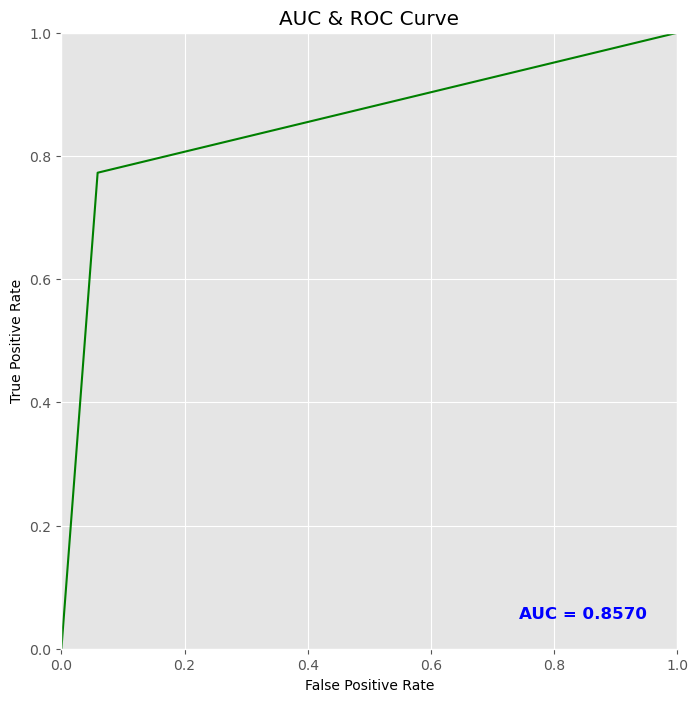

In [358]:
plot_roc_curve(y_test, y_pred)

In [335]:
# %%time
# import numpy as np
# from xgboost import XGBClassifier
# from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, cross_val_score
# from sklearn.metrics import make_scorer




# def balanced_log_loss_manual(y_true, y_pred):
#     # y_true: correct labels 0, 1
#     # y_pred: predicted probabilities of class=1
#     # calculate the number of observations for each class
#     N_0 = np.sum(1 - y_true)
#     N_1 = np.sum(y_true)
#     # calculate the weights for each class to balance classes
#     w_0 = 1 / N_0
#     w_1 = 1 / N_1
#     # calculate the predicted probabilities for each class
#     p_1 = np.clip(y_pred, 1e-15, 1 - 1e-15)
#     p_0 = 1 - p_1
#     # calculate the summed log loss for each class
#     log_loss_0 = -np.sum((1 - y_true) * np.log(p_0))
#     log_loss_1 = -np.sum(y_true * np.log(p_1))
#     # calculate the weighted summed logarithmic loss
#     # (factgor of 2 included to give same result as LL with balanced input)
#     balanced_log_loss = 2*(w_0 * log_loss_0 + w_1 * log_loss_1) / (w_0 + w_1)
#     # return the average log loss
#     return balanced_log_loss/(N_0+N_1)


# # Create an instance of XGBClassifier with early stopping
# xgbc = XGBClassifier(random_state=42)

# # Define the hyperparameter grid
# xgbc_param = {
#     'max_depth': [3,4,5,6,7],
#     'n_estimators': [400,500,600,700,800,1000],
#     'learning_rate': [0.1,0.05,0.01,0.005,0.001],
#     'min_child_weight': [1, 3, 5, 7,10],
#     'subsample': [0.4,0.6, 0.7, 0.8, 0.9,'sqrt']
#     #'objective': ['binary:hinge'] 
# }

# # Set up cross-validation
# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)

# scoring = {
#            'Balanced_logloss': make_scorer(balanced_log_loss_manual, greater_is_better=False, needs_proba=True)
#           }

# #
# # Set up RandomizedSearchCV
# xgbc_random = RandomizedSearchCV(
#     xgbc, xgbc_param, cv=cv, return_train_score=True, scoring=scoring, n_iter=1, 
#     verbose=2, random_state =1, n_jobs = -1,refit='Balanced_logloss'
# )

# # Define the evaluation set
# #eval_set = [(X_train_oversampled, y_train_oversampled), (X_test, y_test)]

# # Fit RandomizedSearchCV with custom evaluation function and eval_set
# xgbc_random.fit(X_train_oversampled, y_train_oversampled, verbose=True)

# # Print the best parameters found by RandomizedSearchCV
# print("Best Parameters:", xgbc_random.best_params_)
# print("Best Accuracy:", xgb_random.best_score_)

Fitting 25 folds for each of 1 candidates, totalling 25 fits
Best Parameters: {'subsample': 0.6, 'n_estimators': 700, 'min_child_weight': 3, 'max_depth': 4, 'learning_rate': 0.1}
Best Accuracy: 0.9663318942664546
CPU times: user 4.64 s, sys: 460 ms, total: 5.1 s
Wall time: 5.85 s
[CV] END learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=700, objective=binary:hinge, subsample=0.6; total time=   1.2s
[CV] END learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=700, objective=binary:hinge, subsample=0.6; total time=   1.2s
[CV] END learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=700, objective=binary:hinge, subsample=0.6; total time=   1.2s
[CV] END learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=700, subsample=0.6; total time=   1.3s
[CV] END learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=700, subsample=0.6; total time=   1.5s
[CV] END learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=700, sub

In [318]:
print("Best Parameters:", xgbc_random.best_params_)

Best Parameters: {'subsample': 0.7, 'n_estimators': 700, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.1}


In [303]:
print("Best Accuracy:", xgb_random.best_score_)

Best Accuracy: 0.9663318942664546


In [319]:
# # Create and train the XGBoost model
# from xgboost import XGBClassifier
# model_xgb_final = XGBClassifier(n_estimators=700, max_depth=6,learning_rate=0.1,min_child_weight=1,subsample=0.7, random_state=1, n_jobs=-1)
# model_res = model_xgb_final.fit(X_train_oversampled, y_train_oversampled)
# #
# # Set up cross-validation
# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)

# # Create the custom scoring metric
# scoring_metric = make_scorer(balanced_log_loss_manual, greater_is_better=False, needs_proba=True)

# # Evaluate model using cross-validation
# scores = cross_val_score(model_xgb_final, X_train_oversampled, y_train_oversampled, scoring=scoring_metric, cv=cv, n_jobs=-1)

# # Make predictions and evaluate the model on the test set
# y_pred = model_res.predict(X_test)
# ac = accuracy_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred, average='weighted')
# cm = confusion_matrix(y_test, y_pred)
# y_predict_proba = model_res.predict_proba(X_test)

# # Print results
# print("CV_Balanced logloss: ", abs(np.mean(scores)))
# print("Actual_balanced_logloss: ",balanced_log_loss_manual(y_test, y_predict_proba[:,1]))
# print("train accuracy: ", model_res.score(X_train_oversampled, y_train_oversampled))
# print("test accuracy: ", model_res.score(X_test, y_test))
# print('XGBoost: Accuracy=%.3f' % (ac))
# print('XGBoost: f1-score=%.3f' % (f1))

# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))
# accuracy = accuracy_score(y_test, y_pred)
# logloss = balanced_log_loss_manual(y_test, model_res.predict_proba(X_test)[:,1])

# Precisionscore = precision_score(y_test, y_pred,average='weighted')
# f1score = f1_score(y_test, y_pred,average='weighted')
# recall = recall_score(y_test, y_pred,average='weighted')
# #auc = metrics.roc_auc_score(y_test, y_pred, average='weighted')
# auc = metrics.roc_auc_score(y_test, y_pred, average='weighted')
# print("auc=%.3f" % auc)
# print("Accuracy: %.2f%%, logloss=%.3f, precisionscore=%.3f, \
#     F1score=%.3f, recall=%.3f, \
#     auc=%.3f" % (accuracy*100.0, logloss, Precisionscore, f1score, recall, auc))
     


CV_Balanced logloss:  0.08271158356508604
Actual_balanced_logloss:  0.25899774804193837
train accuracy:  1.0
test accuracy:  0.9112903225806451
XGBoost: Accuracy=0.911
XGBoost: f1-score=0.909
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       102
           1       0.79      0.68      0.73        22

    accuracy                           0.91       124
   macro avg       0.86      0.82      0.84       124
weighted avg       0.91      0.91      0.91       124

[[98  4]
 [ 7 15]]
auc=0.821
Accuracy: 91.13%, logloss=0.259, precisionscore=0.908,     F1score=0.909, recall=0.911,     auc=0.821


In [320]:
# #Accuracy: 91.94%, logloss=0.196, precisionscore=0.917,     F1score=0.918, recall=0.919,     auc=0.844
# test_preds = model_res.predict_proba(tf)
# test_preds
     

array([[0.97173977, 0.02826021],
       [0.97173977, 0.02826021],
       [0.97173977, 0.02826021],
       [0.97173977, 0.02826021],
       [0.97173977, 0.02826021]], dtype=float32)

In [315]:
# # Create and train the XGBoost model
# from xgboost import XGBClassifier
# model_xgb_final = XGBClassifier(n_estimators=1000, max_depth=5,learning_rate=0.05,min_child_weight=1,subsample=0.7, random_state=1, n_jobs=-1)
# model_res = model_xgb_final.fit(X_train_oversampled, y_train_oversampled)

# # Set up cross-validation
# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)

# # Create the custom scoring metric
# scoring_metric = make_scorer(balanced_log_loss_manual, greater_is_better=False, needs_proba=True)

# # Evaluate model using cross-validation
# scores = cross_val_score(model_xgb_final, X_train_oversampled, y_train_oversampled, scoring=scoring_metric, cv=cv, n_jobs=-1)

# # Make predictions and evaluate the model on the test set
# y_pred = model_res.predict(X_test)
# ac = accuracy_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred, average='weighted')
# cm = confusion_matrix(y_test, y_pred)
# y_predict_proba = model_res.predict_proba(X_test)

# # Print results
# print("CV_Balanced logloss: ", abs(np.mean(scores)))
# print("Actual_balanced_logloss: ",balanced_log_loss_manual(y_test, y_predict_proba[:,1]))
# print("train accuracy: ", model_res.score(X_train_oversampled, y_train_oversampled))
# print("test accuracy: ", model_res.score(X_test, y_test))
# print('XGBoost: Accuracy=%.3f' % (ac))
# print('XGBoost: f1-score=%.3f' % (f1))

# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))
# accuracy = accuracy_score(y_test, y_pred)
# logloss = balanced_log_loss_manual(y_test, model_res.predict_proba(X_test)[:,1])

# Precisionscore = precision_score(y_test, y_pred,average='weighted')
# f1score = f1_score(y_test, y_pred,average='weighted')
# recall = recall_score(y_test, y_pred,average='weighted')
# #auc = metrics.roc_auc_score(y_test, y_pred, average='weighted')
# auc = metrics.roc_auc_score(y_test, y_pred, average='weighted')
# print("auc=%.3f" % auc)
# print("Accuracy: %.2f%%, logloss=%.3f, precisionscore=%.3f, \
#     F1score=%.3f, recall=%.3f, \
#     auc=%.3f" % (accuracy*100.0, logloss, Precisionscore, f1score, recall, auc))
     


CV_Balanced logloss:  0.08264098752936416
Actual_balanced_logloss:  0.20713560382228685
train accuracy:  1.0
test accuracy:  0.9193548387096774
XGBoost: Accuracy=0.919
XGBoost: f1-score=0.918
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       102
           1       0.80      0.73      0.76        22

    accuracy                           0.92       124
   macro avg       0.87      0.84      0.86       124
weighted avg       0.92      0.92      0.92       124

[[98  4]
 [ 6 16]]
auc=0.844
Accuracy: 91.94%, logloss=0.207, precisionscore=0.917,     F1score=0.918, recall=0.919,     auc=0.844


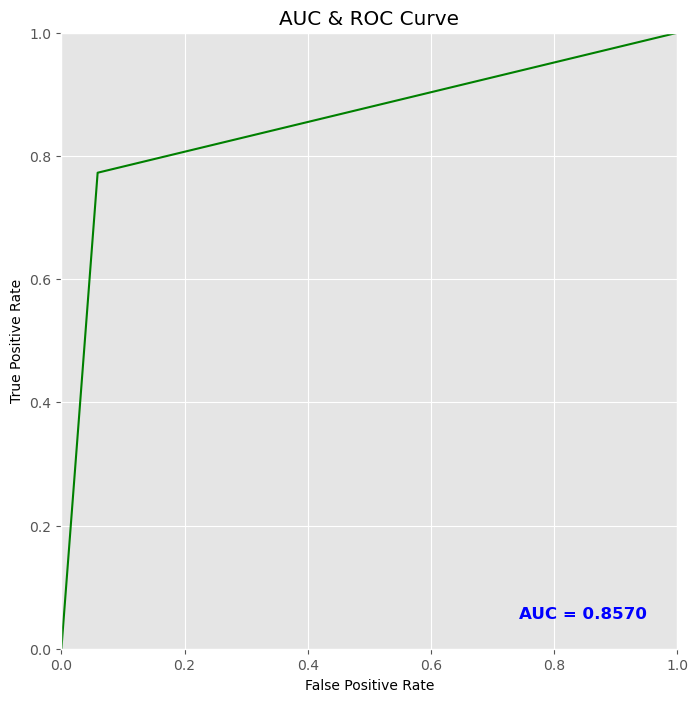

In [360]:
plot_roc_curve(y_test, y_pred)

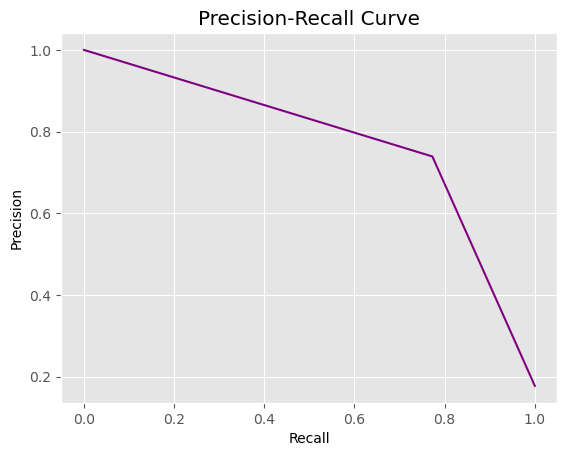

In [361]:
plot_precision_recall_curve(y_test, y_pred)

In [363]:
model_res.feature_importances_

array([0.09590452, 0.02055343, 0.00863809, 0.01017317, 0.00939608,
       0.0137483 , 0.00748055, 0.00813053, 0.02115126, 0.01225291,
       0.02830143, 0.01547782, 0.03070006, 0.01083316, 0.00628754,
       0.01261205, 0.02804417, 0.01361178, 0.00949243, 0.00838775,
       0.0079314 , 0.03142403, 0.02082019, 0.01645429, 0.01101995,
       0.02047914, 0.01110539, 0.02418027, 0.0152533 , 0.02613609,
       0.02129071, 0.00952223, 0.04960721, 0.01292376, 0.01996195,
       0.02180978, 0.015616  , 0.00723223, 0.01988673, 0.00172474,
       0.01771081, 0.01256831, 0.01869038, 0.01234473, 0.03842051,
       0.0375317 , 0.00939684, 0.02053673, 0.01607948, 0.00614923,
       0.00960359, 0.0094706 , 0.01096136, 0.02349131, 0.01222466,
       0.00926343], dtype=float32)

In [253]:
test_df = pd.read_csv("test.csv")
test_df

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [258]:
# test_df['EJ']=test_df['EJ'].map({'A':0,'B':1})
# tf = test_df.set_index("Id")
# tf.columns = tf.columns.str.strip()
# tf = scaler.transform(tf)


In [ ]:
# test_preds = model.predict_proba(tf)
# test_preds
# #     

In [365]:
from sklearn.feature_selection import SelectFromModel
from numpy import sort
thresholds = sort(model_res.feature_importances_)
for thresh in thresholds:
    #select features using threshold
    selection = SelectFromModel(model_res, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train_oversampled)
    # train model
    selection_model = XGBClassifier(n_estimators=400, max_depth=6,learning_rate=0.05,min_child_weight=1,subsample=0.6,
                                random_state=1, n_jobs=-1,scale_pos_weight= ratio_of_neg_to_pos,
                                reg_lambda=0.1, gamma=0.3, colsample_bytree=0.6, reg_alpha=0.001)

    selection_model.fit(select_X_train, y_train_oversampled)
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    y_pred_proba = selection_model.predict_proba(select_X_test)
    #predictions = [round(value) for value in y_pred]
    #prediction = [value for value in y_pred1]
    accuracy = accuracy_score(y_test, y_pred)
    logloss = round(balanced_log_loss_manual(y_test, y_pred_proba[:,1]),3)
    Precisionscore = precision_score(y_test, y_pred, average='weighted')
    f1score = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    auc = metrics.roc_auc_score(y_test, y_pred, average='weighted')
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%, logloss=%.3f, precisionscore=%.3f, \
    F1score=%.3f, recall=%.3f, \
    auc=%.3f" % (thresh, select_X_train.shape[1], accuracy*100.0, logloss, Precisionscore, f1score, recall, auc))
     


Thresh=0.002, n=56, Accuracy: 91.13%, logloss=0.169, precisionscore=0.913,     F1score=0.912, recall=0.911,     auc=0.857
Thresh=0.006, n=55, Accuracy: 89.52%, logloss=0.168, precisionscore=0.893,     F1score=0.894, recall=0.895,     auc=0.811
Thresh=0.006, n=54, Accuracy: 90.32%, logloss=0.160, precisionscore=0.903,     F1score=0.903, recall=0.903,     auc=0.834
Thresh=0.007, n=53, Accuracy: 91.94%, logloss=0.138, precisionscore=0.927,     F1score=0.922, recall=0.919,     auc=0.898
Thresh=0.007, n=52, Accuracy: 92.74%, logloss=0.169, precisionscore=0.929,     F1score=0.928, recall=0.927,     auc=0.885
Thresh=0.008, n=51, Accuracy: 92.74%, logloss=0.164, precisionscore=0.929,     F1score=0.928, recall=0.927,     auc=0.885
Thresh=0.008, n=50, Accuracy: 92.74%, logloss=0.166, precisionscore=0.929,     F1score=0.928, recall=0.927,     auc=0.885
Thresh=0.008, n=49, Accuracy: 92.74%, logloss=0.176, precisionscore=0.929,     F1score=0.928, recall=0.927,     auc=0.885
Thresh=0.009, n=48, Accu

In [394]:
test_df['EJ']=test_df['EJ'].map({'A':0,'B':1})
tf = test_df.set_index("Id")
tf.columns = tf.columns.str.strip()
tf = scaler.transform(tf)
test_preds = model_res.predict_proba(tf)
test_preds

array([[0.96713907, 0.03286093],
       [0.96713907, 0.03286093],
       [0.96713907, 0.03286093],
       [0.96713907, 0.03286093],
       [0.96713907, 0.03286093]], dtype=float32)

In [368]:
tf.shape

(5, 56)

In [369]:
X_train_oversampled.shape

(814, 56)

In [375]:
selected_feature_indices

array([ 0, 32, 44, 45, 21, 12, 10, 16, 29, 27, 53, 35, 30,  8, 22,  1, 47,
       25, 34, 38, 42, 40, 23, 48, 36, 11, 28,  5, 17, 33, 15, 41, 43,  9,
       54, 26, 24, 52, 13,  3, 50, 31, 18, 51, 46,  4, 55,  2, 19,  7, 20,
        6, 37])

In [381]:
feature_importances = model_res.feature_importances_
selected_feature_indices = feature_importances.argsort()[-53:][::-1]
sorted_importances = feature_importances[selected_feature_indices]
sorted_feature_names = feature_names[selected_feature_indices]
sorted_feature_names

Index(['AB', 'DU', 'FD', 'FE', 'CR', 'BQ', 'BN', 'CC', 'DI', 'DF', 'GH', 'EB',
       'DL', 'BC', 'CS', 'AF', 'FL', 'DA', 'DY', 'EH', 'EU', 'EL', 'CU', 'FR',
       'EE', 'BP', 'DH', 'AX', 'CD', 'DV', 'CB', 'EP', 'FC', 'BD', 'GI', 'DE',
       'CW', 'GF', 'BR', 'AM', 'GB', 'DN', 'CF', 'GE', 'FI', 'AR', 'GL', 'AH',
       'CH', 'AZ', 'CL', 'AY', 'EG'],
      dtype='object')

In [398]:
X_train_oversampled[:,selected_feature_indices].shape

(814, 53)

In [399]:
X_test.shape

(124, 56)

In [401]:
# # Create and train the XGBoost model
# from xgboost import XGBClassifier
# ratio_of_neg_to_pos = len(y_train[y_train== 0]) / len(y_train[y_train == 1])

# model_xgb_final = XGBClassifier(n_estimators=400, max_depth=6,learning_rate=0.05,min_child_weight=1,subsample=0.6,
#                                 random_state=1, n_jobs=-1,scale_pos_weight= ratio_of_neg_to_pos,
#                                 reg_lambda=0.1, gamma=0.3, colsample_bytree=0.6, reg_alpha=0.001)

# X_train_best = X_train_oversampled[:,selected_feature_indices]
# model_res_best = model_xgb_final.fit(X_train_best, y_train_oversampled)

# # # Set up cross-validation
# # cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)

# # # Create the custom scoring metric
# # scoring_metric = make_scorer(balanced_log_loss_manual, greater_is_better=False, needs_proba=True)

# # # Evaluate model using cross-validation
# # scores = cross_val_score(model_xgb_final, X_train_oversampled, y_train_oversampled, scoring=scoring_metric, cv=cv, n_jobs=-1)

# # Make predictions and evaluate the model on the test set
# y_pred = model_res_best.predict(X_test[:,selected_feature_indices])
# ac = accuracy_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred, average='weighted')
# cm = confusion_matrix(y_test, y_pred)
# y_predict_proba = model_res_best.predict_proba(X_test[:,selected_feature_indices])

# # Print results
# print("CV_Balanced logloss: ", abs(np.mean(scores)))
# print("Actual_balanced_logloss: ",balanced_log_loss_manual(y_test, y_predict_proba[:,1]))
# print("train accuracy: ", model_res_best.score(X_train_best, y_train_oversampled))
# print("test accuracy: ", model_res_best.score(X_test[:,selected_feature_indices], y_test))
# print('XGBoost: Accuracy=%.3f' % (ac))
# print('XGBoost: f1-score=%.3f' % (f1))

# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))
# accuracy = accuracy_score(y_test, y_pred)
# logloss = balanced_log_loss_manual(y_test, model_res_best.predict_proba(X_test[:,selected_feature_indices])[:,1])

# Precisionscore = precision_score(y_test, y_pred,average='weighted')
# f1score = f1_score(y_test, y_pred,average='weighted')
# recall = recall_score(y_test, y_pred,average='weighted')
# #auc = metrics.roc_auc_score(y_test, y_pred, average='weighted')
# auc = metrics.roc_auc_score(y_test, y_pred, average='weighted')
# print("auc=%.3f" % auc)
# print("Accuracy: %.2f%%, logloss=%.3f, precisionscore=%.3f, \
#     F1score=%.3f, recall=%.3f, \
#     auc=%.3f" % (accuracy*100.0, logloss, Precisionscore, f1score, recall, auc))
     


CV_Balanced logloss:  0.09397136780915945
Actual_balanced_logloss:  0.182598207355274
train accuracy:  1.0
test accuracy:  0.9032258064516129
XGBoost: Accuracy=0.903
XGBoost: f1-score=0.905
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       102
           1       0.71      0.77      0.74        22

    accuracy                           0.90       124
   macro avg       0.83      0.85      0.84       124
weighted avg       0.91      0.90      0.90       124

[[95  7]
 [ 5 17]]
auc=0.852
Accuracy: 90.32%, logloss=0.183, precisionscore=0.907,     F1score=0.905, recall=0.903,     auc=0.852


In [407]:
# Check data types
print("Data Type of X_new:", type(tf))
print("Data Type of X_train_oversampled:", type(X_train_oversampled))

# Check for feature scaling consistency
# If MinMaxScaler was used during preprocessing, adjust accordingly
# If StandardScaler was used, adjust accordingly
# ...

# Verify model compatibility
print("Model Type:", type(model_res))

# Print selected feature indices
print("Selected Feature Indices:", selected_feature_indices)
#print(sort(selected_feature_indices))

# Print shapes
print("Shape of X_new:", tf.shape)
print("Shape of X_train_oversampled:", X_train_oversampled.shape)

# Assuming X_new and X_train_oversampled are numpy arrays
if tf.shape[1] != X_train_oversampled.shape[1]:
    print("Number of features in X_new does not match X_train_oversampled.")
else:
    X_new_selected = tf[:, selected_feature_indices]

    # Now you can use the model to predict with the selected features
    y_new_pred = model_res.predict(X_new_selected)
    y_new_pred_prob = model_res.predict_proba(X_new_selected)

Data Type of X_new: <class 'numpy.ndarray'>
Data Type of X_train_oversampled: <class 'numpy.ndarray'>
Model Type: <class 'xgboost.sklearn.XGBClassifier'>
Selected Feature Indices: [ 0 32 44 45 21 12 10 16 29 27 53 35 30  8 22  1 47 25 34 38 42 40 23 48
 36 11 28  5 17 33 15 41 43  9 54 26 24 52 13  3 50 31 18 51 46  4 55  2
 19  7 20  6 37]
Shape of X_new: (5, 56)
Shape of X_train_oversampled: (814, 56)


ValueError: Feature shape mismatch, expected: 56, got 53